In [18]:
import os

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, set_matplotlib_formats

sns.set_context('talk')

## Load .csv (output of reanalyze.py)

In [19]:
path = '/Users/cudmore/data/laura-ephys/Superior vs Inferior database_master.csv'
df = pd.read_csv(path, header=0) #, dtype={'ABF File': str})
display(df.head())

,Unnamed: 0,file,condition1,condition2,condition3,condition4,spikeNumber,numError,errors,dVthreshold,...,cycleLength_ms,apDuration_ms,diastolicDuration_ms,widths,analysisname,Condition,File Number,Sex,Region,filename
0,0,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,30,0,[],NaN,...,7099.2,161.7,6933.2,"[{'halfHeight': 20, 'risingPnt': 435639, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
1,1,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,31,0,[],NaN,...,383.7,241.0,124.3,"[{'halfHeight': 20, 'risingPnt': 437409, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
2,2,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,32,0,[],NaN,...,213.8,148.2,62.0,"[{'halfHeight': 20, 'risingPnt': 441311, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
3,3,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,33,0,[],NaN,...,466.9,196.5,234.5,"[{'halfHeight': 20, 'risingPnt': 444198, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000
4,4,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,34,0,[],NaN,...,735.1,229.4,500.6,"[{'halfHeight': 20, 'risingPnt': 448826, 'risi...",2020_06_30_0000_s42_26_s65_75,ctrl,1,Male,Inferior,2020_06_30_0000


## Within cell mean of any stat

In [20]:
statStr = 'spikeFreq_hz'

print(statStr)
statDf = df.groupby(['Region', 'analysisname'])[statStr].describe();
display(statDf)


spikeFreq_hz


count      mean       std       min  \
Region   analysisname                                                           
Inferior 2020_06_30_0000_s42_26_s65_75     44.0  2.522046  1.024555  0.116867   
         2020_07_23_0002_s1_19_s67_42      35.0  1.344800  0.993525  0.097373   
         2020_07_23_0003_s177_26_s276_67  145.0  2.248690  1.212770  0.264110   
         2020_07_23_0003_s7_73_s103_03     92.0  1.983403  1.535256  0.133608   
Superior 2020_06_23_0006_s70_08_s158_30   370.0  4.606427  1.123359  0.630398   
         2020_06_30_0002_s114_91_s180_38  134.0  2.805839  1.140580  0.425116   
         2020_07_01_0002_s187_97_s242_81  181.0  5.182838  1.321422  0.231701   
         2020_07_01_0002_s54_80_s104_21   276.0  5.607393  0.237771  2.690342   
         2020_07_16_0004_s1_77_s8_48        5.0  0.733093  0.196936  0.589727   
         2020_07_23_0000_s0_50_s37_13     169.0  4.629782  0.189329  4.113534   
         2020_07_23_0000_s172_05_s210_41  169.0  4.410419  0.177799  3.966680   
         2020_07_23_0001_s29_30_s103_31   335.0  4.595094  0.522690  1.671682   
         2020_07_23_0001_s309_92_s359_33  179.0  3.667522  0.390017  2.536140   

                                               25%       50%       75%  \
Region   analysisname                                                    
Inferior 2020_06_30_0000_s42_26_s65_75    1.601286  2.898648  3.285691   
         2020_07_23_0002_s1_19_s67_42     0.583483  1.137268  1.864356   
         2020_07_23_0003_s177_26_s276_67  1.125619  2.099517  3.190810   
         2020_07_23_0003_s7_73_s103_03    0.646218  1.573980  2.631810   
Superior 2020_06_23_0006_s70_08_s158_30   4.055973  4.811162  5.381415   
         2020_06_30_0002_s114_91_s180_38  1.842990  3.392286  3.751689   
         2020_07_01_0002_s187_97_s242_81  5.227392  5.583473  5.858231   
         2020_07_01_0002_s54_80_s104_21   5.518003  5.625879  5.727377   
         2020_07_16_0004_s1_77_s8_48      0.605254  0.663218  0.737518   
         2020_07_23_0000_s0_50_s37_13     4.496403  4.614675  4.761905   
         2020_07_23_0000_s172_05_s210_41  4.290004  4.407228  4.541326   
         2020_07_23_0001_s29_30_s103_31   4.356351  4.708098  4.910386   
         2020_07_23_0001_s309_92_s359_33  3.436426  3.667033  3.920037   

                                               max  
Region   analysisname                               
Inferior 2020_06_30_0000_s42_26_s65_75    4.060089  
         2020_07_23_0002_s1_19_s67_42     3.813883  
         2020_07_23_0003_s177_26_s276_67  5.035247  
         2020_07_23_0003_s7_73_s103_03    6.075334  
Superior 2020_06_23_0006_s70_08_s158_30   7.987220  
         2020_06_30_0002_s114_91_s180_38  4.526935  
         2020_07_01_0002_s187_97_s242_81  6.418485  
         2020_07_01_0002_s54_80_s104_21   6.112469  
         2020_07_16_0004_s1_77_s8_48      1.069748  
         2020_07_23_0000_s0_50_s37_13     5.117707  
         2020_07_23_0000_s172_05_s210_41  4.930966  
         2020_07_23_0001_s29_30_s103_31   5.892752  
         2020_07_23_0001_s309_92_s359_33  4.526935

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


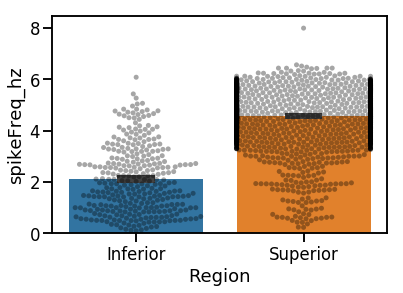

In [6]:

#sns.catplot(data=df, x='Region', y=statStr, hue='Region')

# I want to get the mean per cell and then plot

ax = sns.barplot(x="Region", y=statStr, data=df, ci=68, capsize=0.2)

sns.swarmplot(x="Region", y=statStr, data=df, color="0", alpha=.35)
#sns.stripplot(x="Region", y=statStr, data=df, color="0", alpha=.35)


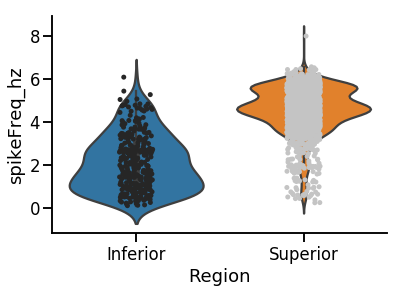

In [7]:
#sns.boxplot(x="Region", y=statStr, kind="box", data=df)

fig, ax = plt.subplots()

g = sns.violinplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                dodge=False,
                ax=ax)
g = sns.stripplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                color = "0.77",
                dodge=False,
                ax=ax)
sns.despine(ax=ax)
#ax.set_ylabel("survival probability")
l = ax.legend()
#l.set_title('Whatever you want')
l.remove()

,spikeFreq_hz_mean,spikeFreq_hz_std,spikeFreq_hz_sem,spikeFreq_hz_count,Region
0,4.606427,1.123359,0.058401,370,Superior
1,2.805839,1.140580,0.098531,134,Superior
2,5.439243,0.875543,0.040956,457,Superior
3,0.733093,0.196936,0.088072,5,Superior
4,4.520101,0.213763,0.011627,338,Superior
5,4.272068,0.652933,0.028800,514,Superior
6,2.522046,1.024555,0.154458,44,Inferior
7,1.344800,0.993525,0.167936,35,Inferior
8,2.145709,1.350214,0.087706,237,Inferior


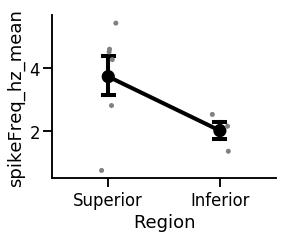

In [8]:
supDf = df [ df['Region']=='Superior' ]
newDf = supDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #.mean()
newDf['Region'] = 'Superior'
newDf.columns = [c if c=='Region' else statStr+'_'+c for c in newDf.columns.to_list()]

infDf = df [ df['Region']=='Inferior' ]
newDf2 = infDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #mean()
newDf2['Region'] = 'Inferior'
newDf2.columns = [c if c=='Region' else statStr+'_'+c for c in newDf2.columns.to_list()]

newDf = newDf.append(newDf2, ignore_index=True)

display(newDf)

fig, ax = plt.subplots(figsize=(4,3))

mStatStr = statStr + '_mean'

sns.stripplot(x='Region', y=mStatStr, data=newDf, color="0.5", ax=ax);
sns.pointplot(x='Region', y=mStatStr, data=newDf, ci=68, capsize=0.1, color='k', ax=ax)
sns.despine()


4.561824449048742 96.45695900924449


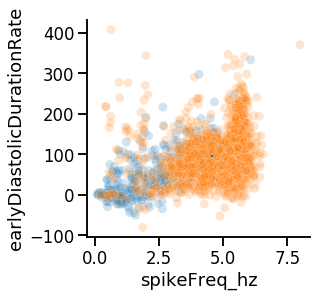

In [9]:
xStat = 'spikeFreq_hz'
yStat = 'earlyDiastolicDurationRate'

fig, ax = plt.subplots(figsize=(4,4))

sns.scatterplot(x=xStat, y=yStat, hue='Region', alpha=0.2, data=df, ax=ax)
#sns.pointplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', hue='Region', ci=68, data=df)
sns.despine()

supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

xList = supDf[xStat].tolist()
xMean = np.nanmean(xList)
xSem = scipy.stats.sem(xList)

yList = supDf[yStat].tolist()
yMean = np.nanmean(yList)
ySem = scipy.stats.sem(yList)

print(xMean, yMean)

ax.errorbar(x=xMean, y=yMean, xerr=xSem, yerr=ySem)

ax.legend().remove()

plt.show()

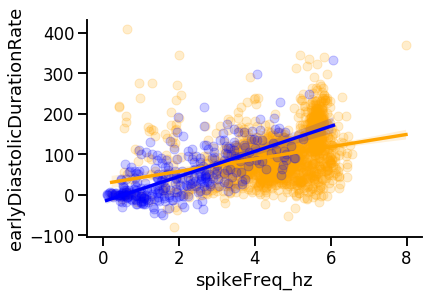

In [10]:
supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='orange', data=supDf, scatter_kws={'alpha':0.2})
sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='blue', data=infDf, scatter_kws={'alpha':0.2})
sns.despine()

In [11]:
df.groupby('filename', as_index=False)['spikeFreq_hz','isi_ms', 'condition1'].mean()

,filename,spikeFreq_hz,isi_ms
0,2020_06_23_0006,4.606427,238.976216
1,2020_06_30_0000,2.522046,674.154545
2,2020_06_30_0002,2.805839,488.191045
3,2020_07_01_0002,5.439243,225.809190
4,2020_07_16_0004,0.733093,1429.280000
5,2020_07_23_0000,4.520101,221.726627
6,2020_07_23_0001,4.272068,240.265759
7,2020_07_23_0002,1.344800,1686.677143
8,2020_07_23_0003,2.145709,802.569198
